In [278]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

df = pd.read_csv("bank-additional-full.csv", delimiter=';')

In [279]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [280]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [281]:
df.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

Finds out how many values for each of the outcome variables. (36,548 for no, 4,640 for yes). This shows that the response to the marketing campaign of 41,188 examples 88.7% opted for 'no'. 

In [282]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [283]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [284]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [285]:
# Check for any null values in Dataframe 
# False means there is no null values
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool



# Data Pre-processing



In [286]:
# Basic histogram function
def plot_hist(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title('Histogram of "{var_name}"'.format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

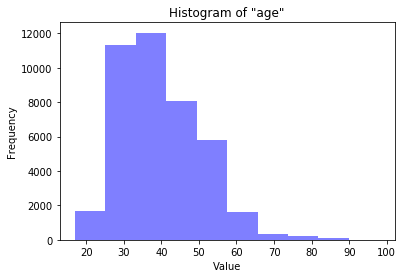

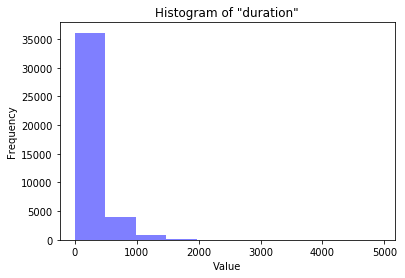

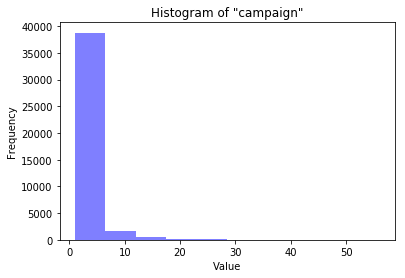

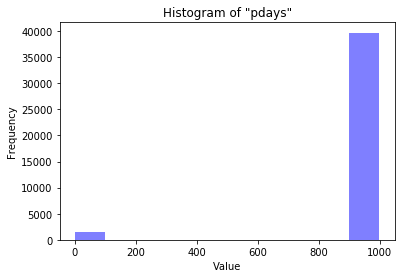

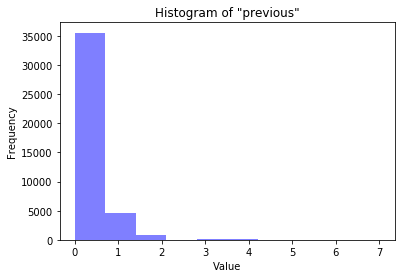

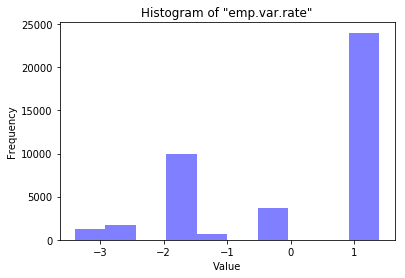

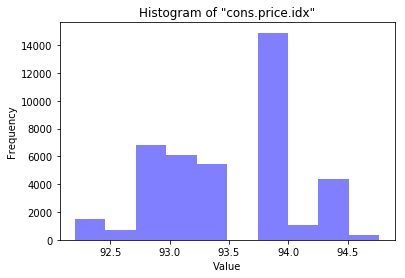

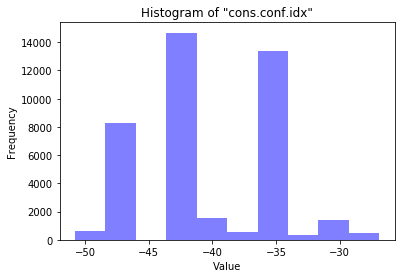

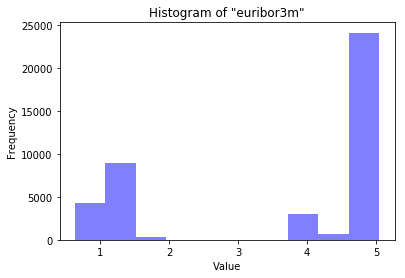

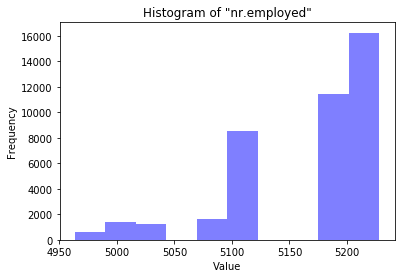

In [287]:
# Basic histogram displaying distribution of age feature
plot_hist(df['age'])
plot_hist(df['duration'])
plot_hist(df['campaign'])
plot_hist(df['pdays'])
plot_hist(df['previous'])
plot_hist(df['emp.var.rate'])
plot_hist(df['cons.price.idx'])
plot_hist(df['cons.conf.idx'])
plot_hist(df['euribor3m'])
plot_hist(df['nr.employed'])

## Find Outliers

In [288]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index [ (x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [289]:
# Find Outliers for age feature
tukey_indices, tukey_values = find_outliers_tukey(df['age'])
np.sort(tukey_values)

array([70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71,
       71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71,
       71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71,
       71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73,
       73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73,
       73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74,
       74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74,
       74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75,
       75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
       75, 75, 75, 76, 76

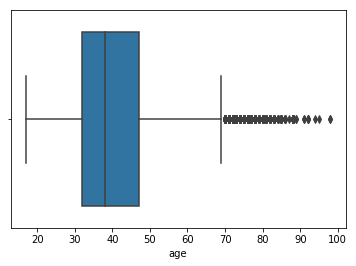

In [290]:
import seaborn as sns
sns.boxplot(x=df['age'])

In [291]:
# Drop outliers identified in the age feature
# Get names of indexes for age feature that has value > or = to outliers
indexNames = df[df['age'] > 69 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

# Display dataFrame descending by age to make sure appropiate rows have been dropped
df['age'].sort_values(ascending=False).head(5)

38679    69
28519    69
37296    69
30294    69
37059    69
Name: age, dtype: int64

In [292]:
df.count().sort_values(ascending=False).head(5)

y              40719
day_of_week    40719
job            40719
marital        40719
education      40719
dtype: int64

[-26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -2

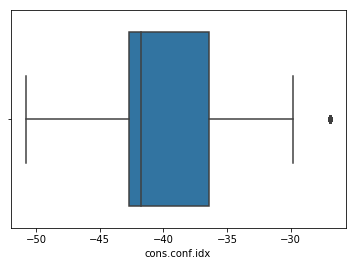

In [293]:
tukey_indices, tukey_values = find_outliers_tukey(df['cons.conf.idx'])
print(np.sort(tukey_values))
sns.boxplot(x=df['cons.conf.idx'])

In [294]:
# Drop outliers identified in the age feature
# Get names of indexes for age feature that has value > or = to outliers
indexNames = df[df['cons.conf.idx'] > -30 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

# Display dataFrame descending by age to make sure appropiate rows have been dropped
df['cons.conf.idx'].sort_values(ascending=True).head(5)

41186   -50.8
41092   -50.8
41093   -50.8
41094   -50.8
41095   -50.8
Name: cons.conf.idx, dtype: float64

In [295]:
df.count()

age               40092
job               40092
marital           40092
education         40092
default           40092
housing           40092
loan              40092
contact           40092
month             40092
day_of_week       40092
duration          40092
campaign          40092
pdays             40092
previous          40092
poutcome          40092
emp.var.rate      40092
cons.price.idx    40092
cons.conf.idx     40092
euribor3m         40092
nr.employed       40092
y                 40092
dtype: int64

## Seperate input attributes and output target

In [296]:
# Assigns outcome variable to integers. 0 = no, 1 = yes
df['y'] = [0 if x == 'no' else 1 for x in df['y']]

# Removes outcome variable from main dataset and creates new dataset containing outcome variable.
X = df.drop('y', 1)
y = df.y

In [297]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [298]:
# Displays the number of attributes which are categorical and how many unique values each category has
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
            col_name=col_name, unique_cat=unique_cat))

Feature 'job' has 12 unique categories
Feature 'marital' has 4 unique categories
Feature 'education' has 8 unique categories
Feature 'default' has 3 unique categories
Feature 'housing' has 3 unique categories
Feature 'loan' has 3 unique categories
Feature 'contact' has 2 unique categories
Feature 'month' has 10 unique categories
Feature 'day_of_week' has 5 unique categories
Feature 'poutcome' has 3 unique categories


In [299]:
# Displays the number of values for each job type (Admin is the most common job)
X['job'].value_counts().sort_values(ascending=False)

admin.           10217
blue-collar       9214
technician        6638
services          3943
management        2859
entrepreneur      1440
self-employed     1394
retired           1237
housemaid         1020
unemployed         979
student            838
unknown            313
Name: job, dtype: int64

All categories have large amounts of values for each unique value, with no stand out categorical value for each. Therefore dummy values will be created for each.

In [300]:
def row_counter(dfName):
    seriesObj = df.apply(lambda x: True if x[dfName] == 'unknown' else False , axis=1)
    numOfRows = len(seriesObj[seriesObj == True].index)
    print('Number of Rows in the dataframe in which', dfName, 'is unknown : ', numOfRows)

In [301]:
row_counter('job')
row_counter('marital')
row_counter('education')
row_counter('default')
row_counter('housing')
row_counter('loan')

Number of Rows in the dataframe in which job is unknown :  313
Number of Rows in the dataframe in which marital is unknown :  78
Number of Rows in the dataframe in which education is unknown :  1646
Number of Rows in the dataframe in which default is unknown :  8542
Number of Rows in the dataframe in which housing is unknown :  967
Number of Rows in the dataframe in which loan is unknown :  967


In [302]:
X['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [303]:
cleanup_nums = {"month": {"mar": 3,"apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, 
                          "nov": 11, "dec": 12 },
               "day_of_week": {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5, "sat": 6, "sun": 7}}
X.replace(cleanup_nums, inplace=True)

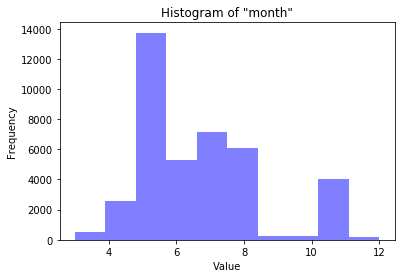

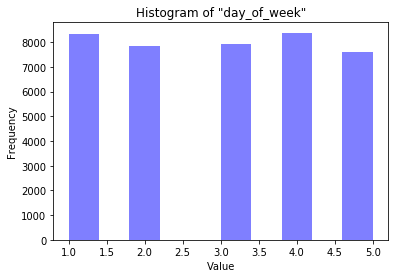

In [304]:
plot_hist(X['month'])
plot_hist(X['day_of_week'])

In [305]:
todummy_list = ['job', 'marital', 'default',
                'housing', 'loan', 'contact', 
                'poutcome', 'education' ]

In [306]:
# Creates dummy list so that all categories can have dummies prodcued
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [307]:
X = dummy_df(X, todummy_list)
X.head(10)

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,5,1,261,1,999,0,1.1,93.994,-36.4,...,1,0,1,0,0,0,0,0,0,0
1,57,5,1,149,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,0,0,0
2,37,5,1,226,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,0,0,0
3,40,5,1,151,1,999,0,1.1,93.994,-36.4,...,1,0,0,1,0,0,0,0,0,0
4,56,5,1,307,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,0,0,0
5,45,5,1,198,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,1,0,0,0,0,0
6,59,5,1,139,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,0,1,0,0
7,41,5,1,217,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,0,0,0,1
8,24,5,1,380,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,0,1,0,0
9,25,5,1,50,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,0,0,0


In [308]:
# Double check there is no missing values in X Dataframe
X.isnull().sum().sort_values(ascending=False).head(5)

education_unknown    0
job_admin.           0
job_unemployed       0
job_technician       0
job_student          0
dtype: int64

In [309]:
# Function for histogram overlaid with response outcome
def plot_histo(x, y):
    plt.hist(list(x[y==0]), alpha=0.5, label='No = 0')
    plt.hist(list(x[y==1]), color='red', alpha=0.5, label='Yes = 1')
    plt.title('Histogram of "{var_name}" by Response Outcome'.format(var_name=x.name))
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

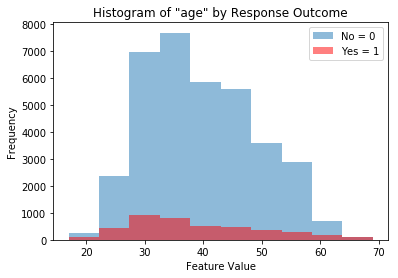

In [310]:
# Histogram displaying age and response outcome
plot_histo(X['age'], y)

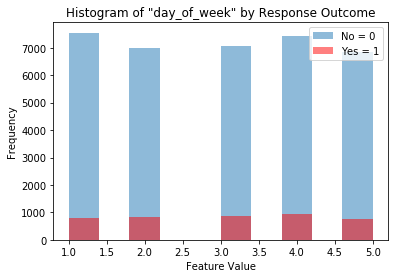

In [311]:
# Histogram displaying age and response outcome
plot_histo(X['day_of_week'], y)

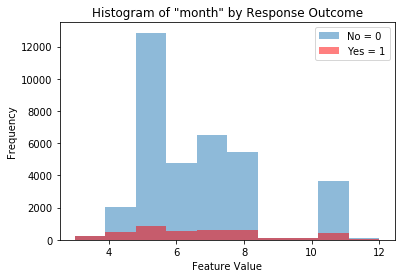

In [312]:
# Histogram displaying age and response outcome
plot_histo(X['month'], y)

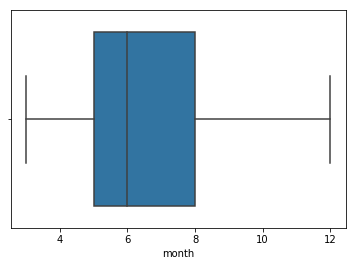

In [313]:
sns.boxplot(x=X['month'])



# Implementation of SVM



In [277]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [347]:
def svm_run():
    
    #Splitting the dataset into test and train sets.
    #80/20 split choosen. 80% to train the classifier, 20% to test it.
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=28)
    
    #80/20 split also applies to the training and validation set used for
    #cross-validation
    X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=28)
    
    #training
    clf = svm.SVC()
    
    print ("Building the SVM module...")
    clf.fit(X_train, y_train)
    print ("Module is built! \n")
    
    from sklearn.svm import SVC  
    svclassifier = SVC(kernel='linear', C = 10)  
    svclassifier.fit(X_train, y_train) 
    
    #Prediction
    y_pred = svclassifier.predict(X_test)
    
    # use KNeighborsClassifier for classification
    classifier = KNeighborsClassifier()
  
    # cross-validation
    scores = cross_val_score(classifier, X_val, y_val, cv=7)
    print("Cross validation scores: \n", scores)
    print("Mean score: \n", np.mean(scores)*100)
    
    from sklearn.metrics import classification_report, confusion_matrix  
    print("\nConfusion Matrix: \n", confusion_matrix(y_test,y_pred))  
    print("Classification Matrix: \n ", classification_report(y_test,y_pred))
    from sklearn.metrics import accuracy_score
    accur = (accuracy_score(y_test, y_pred))
    
    # testing
    predictions = [int(a) for a in clf.predict(X_test)]
    num_correct = sum(int(a == y) for a, y in zip(predictions, y_test))
    
    print ("SVM Classification:")
    #Displays the number of values predicted correctly compared to
    #the number of values tested.
    print ("%s of %s values correct." % (num_correct, len(y_test)))
    print ("Overall Accuracy: \n",accur*100,"% accurate" )

In [348]:
svm_run()

Building the SVM module...
Module is built! 

Cross validation scores: 
 [0.89967285 0.91057797 0.90839695 0.92257361 0.90294438 0.90163934
 0.90710383]
Mean score: 
 90.75584181864463

Confusion Matrix: 
 [[7103   87]
 [ 582  247]]
Classification Matrix: 
               precision    recall  f1-score   support

          0       0.92      0.99      0.96      7190
          1       0.74      0.30      0.42       829

avg / total       0.91      0.92      0.90      8019

SVM Classification:
7211 of 8019 values correct.
Overall Accuracy: 
 91.6573138795361 % accurate


In [342]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=28)
RF.fit(X, y)
RF.predict(X)
print (round(RF.score(X,y), 4)*100,"% accurate")

92.95 % accurate
